# **Cuestión 1**
 **Elaboración de un modelo predictivo de machine learning con el objetivo de predecir si un determinado verraco será o no será productivo.**

**Descripción del tutor de la empresa:**

> *Algunos puntos que me parece interesante que puedas llegar a establecer relaciones son: 
FECHA DE RECOGIDA, CENTRO, CONCENTRACIÓN, DOSIS, RAZA, GENÉTICA, 
MOTILIDAD4, CALIDAD_MOVIMIENTO4, supervivencia del verraco en el centro (FECHA_SALIDA – FECHA LLEGADA), PROCEDENCIA, CAUSA_BAJA, LINEA_GEN ... Sería interesante buscar relaciones entre las variables que se te ocurran y poder obtener una ventaja competitiva con dicha información extraida*

# **Modelo Predictivo - Machine Learning:**

**Modelo predictivo en busca de conocer si un verraco será productivo o no es función a su raza, procedencia, linea genética, centro y dosis reales en cada una de las extracciones realizadas en él**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

df = pd.read_excel('EYACULADOS.xlsx')
verracos = pd.read_excel('VERRACOS.xlsx')

## **Estudio inicial de los datos**

**Las dos bases de datos a utilizar son la perteneicente al archivo denominado EYACULADOS.xlsx (almacenada en la cariable "df") y Verracos.xlsx (almacenada en la variable "verracos")**

In [5]:
df.head(5)

,CODIGO,FECHA_REC,COD_VERRACO,VERRACO,CENTRO,ANALIZADOR,RECOLECTOR,VOLUMEN,CONCENTRACION,MOTILIDAD,CALIDAD_MOVIMIENTO,DOSIS_POTENCIAL,DOSIS_REAL,DOSIS_A_DILUIR,DILUYENTE,SEMEN_ANADIR,CONCENTRACION_REAL,VALIDO,MOTIVO_DESECHO,MOTIVO_DIFERENCIA,HETEROSPERMIA,CODIGO_HETEROSPERMIA,ENVASADAS,DILUIDO,BOLASER_BLANCO,BOLASER_MA,ID_DILUYENTE,ML_DILUYENTE,RAZA,DOSIS DILUIDAS,TEMP_DILUYENTE,CONDUCTIVIDAD
0,140901,2020-01-03,2095,620ND06,CAL,68,56,317,76,9,7,10,10,0.0,513.0,317,2409,True,OK,OK,True,N07DDA10101,98.3125,True,30995.0,0.0,2730.0,513.0,DANBRED,10,20.299999,10.6
1,140902,2020-01-03,1872,520ND19,CAL,68,55,357,61,9,7,9,9,0.0,390.0,357,2420,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,390.0,DANBRED,9,20.299999,10.4
2,140903,2020-01-03,2094,620ND05,CAL,68,83,511,156,9,7,36,36,0.0,2477.0,511,2214,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,2477.0,DANBRED,36,20.299999,10.5
3,140904,2020-01-03,2086,620ND96,CAL,68,78,497,134,9,8,30,30,0.0,1993.0,497,2220,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,1993.0,DANBRED,30,20.299999,10.6
4,140905,2020-01-03,2470,807DP42,CAL,68,83,572,116,9,7,30,30,0.0,1918.0,572,2212,True,OK,OK,True,N07DPA10101,82.0000,True,30995.0,0.0,2730.0,1918.0,DUPIC,30,20.400000,9.6


In [6]:
df['AÑO'] = df['FECHA_REC'].dt.year
df['MES'] = df['FECHA_REC'].dt.month
df.head(5)

,CODIGO,FECHA_REC,COD_VERRACO,VERRACO,CENTRO,ANALIZADOR,RECOLECTOR,VOLUMEN,CONCENTRACION,MOTILIDAD,CALIDAD_MOVIMIENTO,DOSIS_POTENCIAL,DOSIS_REAL,DOSIS_A_DILUIR,DILUYENTE,SEMEN_ANADIR,CONCENTRACION_REAL,VALIDO,MOTIVO_DESECHO,MOTIVO_DIFERENCIA,HETEROSPERMIA,CODIGO_HETEROSPERMIA,ENVASADAS,DILUIDO,BOLASER_BLANCO,BOLASER_MA,ID_DILUYENTE,ML_DILUYENTE,RAZA,DOSIS DILUIDAS,TEMP_DILUYENTE,CONDUCTIVIDAD,AÑO,MES
0,140901,2020-01-03,2095,620ND06,CAL,68,56,317,76,9,7,10,10,0.0,513.0,317,2409,True,OK,OK,True,N07DDA10101,98.3125,True,30995.0,0.0,2730.0,513.0,DANBRED,10,20.299999,10.6,2020,1
1,140902,2020-01-03,1872,520ND19,CAL,68,55,357,61,9,7,9,9,0.0,390.0,357,2420,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,390.0,DANBRED,9,20.299999,10.4,2020,1
2,140903,2020-01-03,2094,620ND05,CAL,68,83,511,156,9,7,36,36,0.0,2477.0,511,2214,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,2477.0,DANBRED,36,20.299999,10.5,2020,1
3,140904,2020-01-03,2086,620ND96,CAL,68,78,497,134,9,8,30,30,0.0,1993.0,497,2220,True,OK,OK,True,N07DDA10101,0.0000,True,30995.0,0.0,2730.0,1993.0,DANBRED,30,20.299999,10.6,2020,1
4,140905,2020-01-03,2470,807DP42,CAL,68,83,572,116,9,7,30,30,0.0,1918.0,572,2212,True,OK,OK,True,N07DPA10101,82.0000,True,30995.0,0.0,2730.0,1918.0,DUPIC,30,20.400000,9.6,2020,1


In [7]:
print(df['AÑO'].value_counts())
print(df['MES'].value_counts())

2015    23414
2017    21919
2020    20761
2016    20234
2018    20094
2019    19847
2014    14042
2013    12638
2012      628
2021      122
Name: AÑO, dtype: int64
9     13848
8     13764
10    13711
12    13637
7     13279
6     12834
3     12752
5     12555
4     12553
11    12288
1     11266
2     11212
Name: MES, dtype: int64


In [8]:
df['CENTRO'].value_counts()

CAL      100158
PEÑAS     48924
TOL        4617
Name: CENTRO, dtype: int64

In [9]:
df['RAZA'].value_counts()

0             50148
DANBRED       24808
AND           10479
PIETUPBJJ      7736
PIETUPBNN      6542
PAC            6518
TDDDD          5352
DUPIC          5178
PIETUPB        3967
AGSG           3900
TEEEE          3597
DNA            2050
PIETAXIOM      1990
DURGENES       1761
ADN            1679
TLLLL          1635
TUUUUIBE       1247
TVVVV          1183
DCAXIOM        1085
LDAX           1075
TPPNP          1028
TPPPPTOP        975
BLUEACMC        846
DCADN           699
TDDPP           698
LWAX            631
LDADN           603
TUUUU           506
PIETUPBFR       492
PI ALEM NP      467
TIIII           456
IBERICO         396
TPPPPELI        276
LWACMC          263
TZZZZGGP        263
LWADN           261
MAXSEG          230
TAAAAGGP        228
DURGENMJJ       223
DURGENG         222
ADNREK          221
DURGENM         205
DURGENESM       165
TUUUUEFI        158
TUUUUCAL        149
L65P+           142
TZZZZ           128
PACCAR          100
PIETSERGAL       87
TUUUUGGP         30


In [10]:
verracos.head()

,CODIGO,CLASE,VERRACO,TATUAJE,CENTRO,FECHA_NACTO,FECHA_LLEGADA,FECHA_SALIDA,ACTIVO,STRESS,PROCEDENCIA,DESTINO,CAUSA_BAJA,LINEA_GEN,INICIO_AMORT,COSTE_AMORT,MESES_AMORT,COD_ANT,PROPIEDAD_CLIENTE,COD_CLIENTE,ULTIMA_AMORTIZACION,IMP_PTE_AMORTIZAR,NUM_ACTIVO_FIJO,RECLAMADO,CUARENTENA,GENETICA,RAZA2,FECHA_ENTRADA_PROD
0,828,TUUUU,406,A4V7Z,CAL,NaT,2008-01-22,2008-09-03,False,NaN,NaN,NaN,29,NaN,2008-01-22,2500,18,828,False,NaN,NaT,NaN,NaN,False,NaN,NaN,NaN,NaT
1,829,TUUUU,407,A2V7W,CAL,2007-03-04,2008-03-06,2008-09-03,False,NaN,NaN,NaN,29,NaN,2008-03-06,2500,18,829,False,NaN,NaT,NaN,NaN,False,NaN,NaN,NaN,NaT
2,830,TUUUU,408,A8V2P,CAL,2007-12-21,2008-03-06,2009-01-08,False,NaN,NaN,CARNICAS CIEZANAS,15,NaN,2008-03-06,2500,18,830,False,NaN,NaT,NaN,NaN,False,NaN,NaN,NaN,NaT
3,831,TUUUU,409,S7N8F,CAL,2007-03-06,2008-03-06,2008-09-03,False,NaN,NaN,NaN,29,NaN,2008-03-06,2500,18,831,False,NaN,NaT,NaN,NaN,False,NaN,NaN,NaN,NaT
4,832,TUUUU,410,S8N7D,CAL,2007-05-11,2008-03-06,2008-12-11,False,NaN,NaN,NaN,29,NaN,2008-03-06,2500,18,832,False,NaN,NaT,NaN,NaN,False,NaN,NaN,NaN,NaT


In [11]:
verracos['LINEA_GEN'].value_counts()

PIETUPB      214
DANBRED      197
PAC          106
TDDDD         70
AND           65
DURGEN        38
DUPIC         35
TUUUU         34
PTAXIOM       34
TEEEE         33
TAAAA         33
TVVVV         28
TZZZZ         27
TPPPP         27
BLUEACMC      21
TLLLL         20
DNA           18
LDAX          18
AGSG          17
TDDPP         16
PTADN         13
DURAXIOM      12
TIIII         12
LWAX          10
LWACMC        10
PTSER          9
LDADN          8
TPPNP          8
TNNNN          8
PTALE          7
DURADN         7
LWADN          5
MAXSEG         5
PIETRAIN       5
ADNREK         4
TBBBB          4
L65            4
PIETUPBFR      4
TPPNN          3
IBERICO        3
PTAUSBAR       1
PIETGEN        1
Name: LINEA_GEN, dtype: int64

In [12]:
verracos['PROCEDENCIA'].value_counts()

PEÑAS DE SAN PEDRO                                    159
MEJORADA                                              102
ANTONIO LOPEZ                                          83
BURUTAIN                                               53
ESCORIAL                                               50
PEÑAS                                                  48
QUALITAT ESPERMATICA                                   44
AIM LEON                                               42
TAFALLA                                                37
SINOVAS                                                34
GANADOS PERALTA S.L                                    24
ACOMPOR                                                24
ALMENAR                                                23
ZAHARA                                                 22
GENESUS INC OAKVILLE MB ID NO 5326121                  18
LA COMETA                                              17
CAN JAUMO                                              17
EXPLOTACIONES 

**Para saber si un verraco es productivo o no es necesario establecer un mínimo de dosis reales producidas en un año**

In [13]:
group_1 = df.groupby(['COD_VERRACO', 'AÑO'])['DOSIS_REAL'].count()
group_1 = pd.DataFrame(group_1)
group_1 = group_1.reset_index()
group_1.head()

,COD_VERRACO,AÑO,DOSIS_REAL
0,770,2013,1
1,1048,2012,3
2,1048,2013,18
3,1049,2012,3
4,1049,2013,12


In [14]:
group_1.shape

(3146, 3)

In [15]:
merged = pd.merge(df, group_1, on=['COD_VERRACO', 'AÑO'])

In [16]:
merged.head(10)

,CODIGO,FECHA_REC,COD_VERRACO,VERRACO,CENTRO,ANALIZADOR,RECOLECTOR,VOLUMEN,CONCENTRACION,MOTILIDAD,CALIDAD_MOVIMIENTO,DOSIS_POTENCIAL,DOSIS_REAL_x,DOSIS_A_DILUIR,DILUYENTE,SEMEN_ANADIR,CONCENTRACION_REAL,VALIDO,MOTIVO_DESECHO,MOTIVO_DIFERENCIA,HETEROSPERMIA,CODIGO_HETEROSPERMIA,ENVASADAS,DILUIDO,BOLASER_BLANCO,BOLASER_MA,ID_DILUYENTE,ML_DILUYENTE,RAZA,DOSIS DILUIDAS,TEMP_DILUYENTE,CONDUCTIVIDAD,AÑO,MES,DOSIS_REAL_y
0,140901,2020-01-03,2095,620ND06,CAL,68,56,317,76,9,7,10,10,0.0,513.0,317,2409,True,OK,OK,True,N07DDA10101,98.3125,True,30995.0,0.0,2730.0,513.0,DANBRED,10,20.299999,10.6,2020,1,18
1,141423,2020-01-13,2095,620ND06,CAL,68,55,562,87,8,7,22,22,0.0,1264.0,562,2222,True,OK,OK,True,N07DDA10303,68.6250,True,31483.0,0.0,2749.0,1264.0,DANBRED,22,20.500000,10.7,2020,1,18
2,141683,2020-01-17,2095,620ND06,CAL,68,78,639,166,9,7,48,48,0.0,3345.0,639,2210,True,OK,OK,True,N07DDA10310,0.0000,True,31475.0,0.0,2760.0,3345.0,DANBRED,48,20.299999,10.4,2020,1,18
3,141838,2020-01-20,2095,620ND06,CAL,68,55,272,96,9,8,11,11,0.0,641.0,272,2374,True,OK,OK,True,N07DDA10403,0.0000,True,31343.0,0.0,2765.0,641.0,DANBRED,11,20.500000,10.5,2020,1,18
4,142047,2020-01-24,2095,620ND06,CAL,68,83,500,76,9,8,17,17,0.0,911.0,500,2235,True,OK,OK,True,N07DDA10406,0.0000,True,30832.0,0.0,2774.0,911.0,DANBRED,17,20.200001,10.4,2020,1,18
5,142252,2020-01-27,2095,620ND06,CAL,68,83,433,92,9,7,18,18,0.0,1061.0,433,2213,True,OK,OK,True,N07DDA10502,0.0000,True,30999.0,0.0,2780.0,1061.0,DANBRED,18,20.799999,10.8,2020,1,18
6,142651,2020-02-03,2095,620ND06,CAL,68,55,643,111,9,8,32,32,0.0,2013.0,643,2230,True,OK,OK,True,N07DDA10602,0.0000,True,30976.0,0.0,2795.0,2013.0,DANBRED,32,20.900000,10.6,2020,2,18
7,142857,2020-02-07,2095,620ND06,CAL,68,55,354,66,9,7,10,10,0.0,476.0,354,2336,True,OK,OK,True,N07DDA10606,0.0000,True,31049.0,0.0,2806.0,476.0,DANBRED,10,21.100000,10.5,2020,2,18
8,143016,2020-02-10,2095,620ND06,CAL,68,83,458,72,9,7,14,14,0.0,704.0,458,2355,True,OK,OK,True,N07DDA10703,0.0000,True,31177.0,0.0,2812.0,704.0,DANBRED,14,20.799999,10.4,2020,2,18
9,142449,2020-01-29,2095,620ND06,CAL,68,78,380,56,8,7,9,0,0.0,0.0,32,0,False,F,OK,False,NaN,0.0000,False,30983.0,0.0,0.0,0.0,DANBRED,0,NaN,NaN,2020,1,18


**DOSIS_REAL_y es el valor de la producción de dosis anual en el año de la fecha de recogida. En base a este dato y suponiendo que, para ser considerado productivo, un verraco ha de producir más de 80 dosis al año, creo la nueva columna 'PRODUCTIVO' con valores 1 si es productivo, 0 si no.**

**Este valor que marca la productividad o no de un semental es proporcionado por la empresa, el cual es el más frecuente según la distribución normal realizada más adelante**

In [17]:
merged['DOSIS_REAL_y'].unique()

array([ 18,  11,  45,  17,  81,   2,  73,  37,  62,  56,  36,  80,  84,
        70,  86,  58,  65,  28, 120,  44,   9, 128, 101,  51,  64,  61,
        48,  33,  53,  82, 130,  60,  46,  77,  92,  76,  47,  72,  31,
        79,  71,  90,  95,  26,  19, 138,  94, 139, 141, 135, 134, 133,
       126, 147, 131, 136,  30, 123,  24,  40,  21,  29,  27,  39,   4,
        89,   1,  42,  14,  32,  59, 140,  10, 143, 116,  22, 145, 100,
        63,  88,  15,  85,  54,  35,  74,  83,  20,  69,  52,  41,   7,
       109,  99,  50,  55,  13,  23,  49, 121, 103,  87,  43,  75,  34,
        68,  91, 125,  16, 127,  78,   5,  67,  66,  57,  12,  25,   3,
         8,   6, 104,  97, 106,  96, 144, 107, 114, 115, 118, 108, 112,
        98, 166, 119, 105, 132, 102, 113, 152, 165, 156, 111,  93,  38,
       122, 117, 124, 110, 129, 137, 142, 148, 154, 151])

(array([ 6034., 10354., 17325., 19186., 28184., 25956., 25327., 12883.,
         7506.,   944.]),
 array([  1. ,  17.5,  34. ,  50.5,  67. ,  83.5, 100. , 116.5, 133. ,
        149.5, 166. ]),
 <a list of 10 Patch objects>)

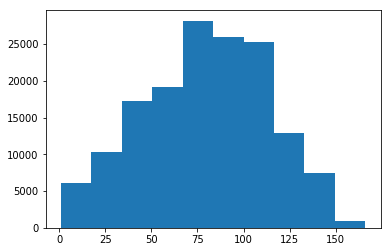

In [18]:
plt.hist(merged['DOSIS_REAL_y'])

In [19]:
merged['PRODUCTIVO'] = 0

In [20]:
merged['PRODUCTIVO'] = np.where(merged['DOSIS_REAL_y'] >= 80, 1, 0)

In [21]:
merged.head()

,CODIGO,FECHA_REC,COD_VERRACO,VERRACO,CENTRO,ANALIZADOR,RECOLECTOR,VOLUMEN,CONCENTRACION,MOTILIDAD,CALIDAD_MOVIMIENTO,DOSIS_POTENCIAL,DOSIS_REAL_x,DOSIS_A_DILUIR,DILUYENTE,SEMEN_ANADIR,CONCENTRACION_REAL,VALIDO,MOTIVO_DESECHO,MOTIVO_DIFERENCIA,HETEROSPERMIA,CODIGO_HETEROSPERMIA,ENVASADAS,DILUIDO,BOLASER_BLANCO,BOLASER_MA,ID_DILUYENTE,ML_DILUYENTE,RAZA,DOSIS DILUIDAS,TEMP_DILUYENTE,CONDUCTIVIDAD,AÑO,MES,DOSIS_REAL_y,PRODUCTIVO
0,140901,2020-01-03,2095,620ND06,CAL,68,56,317,76,9,7,10,10,0.0,513.0,317,2409,True,OK,OK,True,N07DDA10101,98.3125,True,30995.0,0.0,2730.0,513.0,DANBRED,10,20.299999,10.6,2020,1,18,0
1,141423,2020-01-13,2095,620ND06,CAL,68,55,562,87,8,7,22,22,0.0,1264.0,562,2222,True,OK,OK,True,N07DDA10303,68.6250,True,31483.0,0.0,2749.0,1264.0,DANBRED,22,20.500000,10.7,2020,1,18,0
2,141683,2020-01-17,2095,620ND06,CAL,68,78,639,166,9,7,48,48,0.0,3345.0,639,2210,True,OK,OK,True,N07DDA10310,0.0000,True,31475.0,0.0,2760.0,3345.0,DANBRED,48,20.299999,10.4,2020,1,18,0
3,141838,2020-01-20,2095,620ND06,CAL,68,55,272,96,9,8,11,11,0.0,641.0,272,2374,True,OK,OK,True,N07DDA10403,0.0000,True,31343.0,0.0,2765.0,641.0,DANBRED,11,20.500000,10.5,2020,1,18,0
4,142047,2020-01-24,2095,620ND06,CAL,68,83,500,76,9,8,17,17,0.0,911.0,500,2235,True,OK,OK,True,N07DDA10406,0.0000,True,30832.0,0.0,2774.0,911.0,DANBRED,17,20.200001,10.4,2020,1,18,0


In [22]:
merged['PRODUCTIVO'].value_counts()

1    78700
0    74999
Name: PRODUCTIVO, dtype: int64

**Del data frame de VERRACOS no nos interesa toda la información existente. Me creo un dataframe que posteriormente uniremos a "datos_modelo", base de datos que será la fuente de información para el modelo. Así mismo, del dataframe de EYACULADOS no nos interesa toda la información**

In [23]:
small_verracos = verracos.loc[:, ['LINEA_GEN', 'CODIGO', 'PROCEDENCIA']]
small_eyaculados = merged.loc[:, ['COD_VERRACO', 'CENTRO', 'DOSIS_REAL_x', 'RAZA', 'AÑO', 'DOSIS_REAL_y', 'PRODUCTIVO']]

In [26]:
datos_modelo = pd.merge(small_eyaculados, small_verracos, left_on='COD_VERRACO', right_on='CODIGO', how='outer')

In [27]:
datos_modelo.head()

,COD_VERRACO,CENTRO,DOSIS_REAL_x,RAZA,AÑO,DOSIS_REAL_y,PRODUCTIVO,LINEA_GEN,CODIGO,PROCEDENCIA
0,2095.0,CAL,10.0,DANBRED,2020.0,18.0,0.0,DANBRED,2095.0,FUGLSANG DENMARK 4160 HERLUFMAGLE
1,2095.0,CAL,22.0,DANBRED,2020.0,18.0,0.0,DANBRED,2095.0,FUGLSANG DENMARK 4160 HERLUFMAGLE
2,2095.0,CAL,48.0,DANBRED,2020.0,18.0,0.0,DANBRED,2095.0,FUGLSANG DENMARK 4160 HERLUFMAGLE
3,2095.0,CAL,11.0,DANBRED,2020.0,18.0,0.0,DANBRED,2095.0,FUGLSANG DENMARK 4160 HERLUFMAGLE
4,2095.0,CAL,17.0,DANBRED,2020.0,18.0,0.0,DANBRED,2095.0,FUGLSANG DENMARK 4160 HERLUFMAGLE


In [28]:
datos_modelo.shape

(154216, 10)

## PREPROCESAMIENTO - ANÁLISI Y LIMPIEZA

**Una vez seleccionado y calculado los datos necesarios para el correcto funcionamiento del modelo, procedo a hacer la correspondiente limpieza de datos en busca de valores NaN, NaT o valores carentes de sentido**

In [29]:
datos_modelo.shape

(154216, 10)

In [30]:
print(datos_modelo.isnull().sum().sum())

45218


**Existe un total de 45.218 valores NaN, voy a localizar dónde están exactamente:**

In [31]:
datos_modelo.isnull().sum()

COD_VERRACO       517
CENTRO            517
DOSIS_REAL_x      517
RAZA             1091
AÑO               517
DOSIS_REAL_y      517
PRODUCTIVO        517
LINEA_GEN       20952
CODIGO            214
PROCEDENCIA     19859
dtype: int64

**Como tanto en CODIGO como en COD_VERRACO existen valores nulos siendo estos verracos sin código asignado, los elimino directamente. Son verracos a los que no se les puede realizar un seguimiento.**

In [32]:
datos_modelo = datos_modelo.dropna(subset=["COD_VERRACO"])
datos_modelo = datos_modelo.dropna(subset=["CODIGO"])

In [33]:
datos_modelo.isnull().sum()

COD_VERRACO         0
CENTRO              0
DOSIS_REAL_x        0
RAZA              574
AÑO                 0
DOSIS_REAL_y        0
PRODUCTIVO          0
LINEA_GEN       20246
CODIGO              0
PROCEDENCIA     19391
dtype: int64

**Al ser variables categóricas (y no poder asignar la media de los valores de los verracos semejantes, por ejemplo) he decidido eliminar los NaN restantes**

In [34]:
datos_modelo = datos_modelo.dropna(subset=["LINEA_GEN"])
datos_modelo = datos_modelo.dropna(subset=["PROCEDENCIA"])
datos_modelo = datos_modelo.dropna(subset=["RAZA"])

In [35]:
datos_modelo.isnull().sum()

COD_VERRACO     0
CENTRO          0
DOSIS_REAL_x    0
RAZA            0
AÑO             0
DOSIS_REAL_y    0
PRODUCTIVO      0
LINEA_GEN       0
CODIGO          0
PROCEDENCIA     0
dtype: int64

In [36]:
print(datos_modelo.shape)
print(datos_modelo.isnull().sum().sum())

(115101, 10)
0


In [37]:
datos_modelo.head()

,COD_VERRACO,CENTRO,DOSIS_REAL_x,RAZA,AÑO,DOSIS_REAL_y,PRODUCTIVO,LINEA_GEN,CODIGO,PROCEDENCIA
0,2095.0,CAL,10.0,DANBRED,2020.0,18.0,0.0,DANBRED,2095.0,FUGLSANG DENMARK 4160 HERLUFMAGLE
1,2095.0,CAL,22.0,DANBRED,2020.0,18.0,0.0,DANBRED,2095.0,FUGLSANG DENMARK 4160 HERLUFMAGLE
2,2095.0,CAL,48.0,DANBRED,2020.0,18.0,0.0,DANBRED,2095.0,FUGLSANG DENMARK 4160 HERLUFMAGLE
3,2095.0,CAL,11.0,DANBRED,2020.0,18.0,0.0,DANBRED,2095.0,FUGLSANG DENMARK 4160 HERLUFMAGLE
4,2095.0,CAL,17.0,DANBRED,2020.0,18.0,0.0,DANBRED,2095.0,FUGLSANG DENMARK 4160 HERLUFMAGLE


**Una vez eliminados los NaN, se analizan particularidades**

In [38]:
datos_modelo['CENTRO'].value_counts()

CAL      75155
PEÑAS    36165
TOL       3781
Name: CENTRO, dtype: int64

**Nada mal en CENTRO**

In [39]:
datos_modelo['RAZA'].value_counts()

0             23941
DANBRED       21051
AND            8513
PIETUPBNN      6542
PIETUPBJJ      6423
PAC            5417
TDDDD          5349
DUPIC          5152
PIETUPB        3967
TEEEE          3595
DNA            2050
PIETAXIOM      1989
DURGENES       1759
AGSG           1725
TLLLL          1635
ADN            1583
TUUUUIBE       1247
TVVVV          1173
DCAXIOM         999
LDAX            989
TPPNP           875
TPPPPTOP        871
BLUEACMC        779
TDDPP           698
LWAX            631
LDADN           548
PIETUPBFR       492
PI ALEM NP      464
TIIII           451
DCADN           428
IBERICO         396
TUUUU           294
TPPPPELI        276
LWADN           261
TZZZZGGP        236
MAXSEG          230
DURGENMJJ       223
DURGENG         222
ADNREK          221
DURGENM         205
TAAAAGGP        199
DURGENESM       165
L65P+           142
LWACMC          127
TUUUUEFI        116
TZZZZ           111
PACCAR          100
PIETSERGAL       87
TUUUUCAL         87
TUUUUGGP         30


**Hay una RAZA denominada '-' y otra con nombre '0'. Elimino ambas**

In [40]:
datos_modelo[datos_modelo['RAZA'] == '-']

,COD_VERRACO,CENTRO,DOSIS_REAL_x,RAZA,AÑO,DOSIS_REAL_y,PRODUCTIVO,LINEA_GEN,CODIGO,PROCEDENCIA
35099,2484.0,TOL,13.0,-,2019.0,88.0,1.0,TDDPP,2484.0,GRANJA ZAHARA


In [41]:
datos_modelo[datos_modelo['RAZA'] == 0].head()

,COD_VERRACO,CENTRO,DOSIS_REAL_x,RAZA,AÑO,DOSIS_REAL_y,PRODUCTIVO,LINEA_GEN,CODIGO,PROCEDENCIA
906,1872.0,PEÑAS,18.0,0,2015.0,61.0,0.0,DANBRED,1872.0,DESCONOCIDA
907,1872.0,PEÑAS,24.0,0,2015.0,61.0,0.0,DANBRED,1872.0,DESCONOCIDA
908,1872.0,PEÑAS,38.0,0,2015.0,61.0,0.0,DANBRED,1872.0,DESCONOCIDA
909,1872.0,PEÑAS,31.0,0,2015.0,61.0,0.0,DANBRED,1872.0,DESCONOCIDA
910,1872.0,PEÑAS,10.0,0,2015.0,61.0,0.0,DANBRED,1872.0,DESCONOCIDA


In [42]:
datos_modelo = datos_modelo.drop(datos_modelo[datos_modelo['RAZA'] == '-'].index, axis=0)
datos_modelo = datos_modelo.drop(datos_modelo[datos_modelo['RAZA'] == 0].index, axis=0)

In [43]:
datos_modelo['RAZA'].value_counts()

DANBRED       21051
AND            8513
PIETUPBNN      6542
PIETUPBJJ      6423
PAC            5417
TDDDD          5349
DUPIC          5152
PIETUPB        3967
TEEEE          3595
DNA            2050
PIETAXIOM      1989
DURGENES       1759
AGSG           1725
TLLLL          1635
ADN            1583
TUUUUIBE       1247
TVVVV          1173
DCAXIOM         999
LDAX            989
TPPNP           875
TPPPPTOP        871
BLUEACMC        779
TDDPP           698
LWAX            631
LDADN           548
PIETUPBFR       492
PI ALEM NP      464
TIIII           451
DCADN           428
IBERICO         396
TUUUU           294
TPPPPELI        276
LWADN           261
TZZZZGGP        236
MAXSEG          230
DURGENMJJ       223
DURGENG         222
ADNREK          221
DURGENM         205
TAAAAGGP        199
DURGENESM       165
L65P+           142
LWACMC          127
TUUUUEFI        116
TZZZZ           111
PACCAR          100
TUUUUCAL         87
PIETSERGAL       87
TUUUUGGP         30
TPPNN            22


In [44]:
datos_modelo.shape

(91159, 10)

**Eliminados los valores extraños en RAZA**

In [45]:
print(datos_modelo['DOSIS_REAL_x'].min())
print(datos_modelo['DOSIS_REAL_x'].max())

0.0
122.0


In [46]:
datos_modelo['DOSIS_REAL_x'].unique()

array([ 10.,  22.,  48.,  11.,  17.,  18.,  32.,  14.,   0.,  25.,  23.,
        21.,  33.,  58.,  15.,  43.,  12.,  13.,  70.,  24.,  28.,  36.,
        41.,  57.,  38.,  26.,  16.,  51.,  37.,   6.,  39.,  20.,   8.,
         9.,  19.,   5.,  34.,  47.,  31.,  27.,  29.,  42.,  52.,  30.,
        44.,  40.,  66.,  50.,  71.,  55.,  45.,  68.,  35.,   4.,  74.,
        59.,  53.,   3.,  67.,  80.,  61.,  64.,  54.,  63.,  90.,  62.,
        60.,  65.,  88.,  49.,  46.,   7.,   2.,  56.,  69.,  76.,  75.,
        84.,  85.,  82.,  72.,  73.,  89.,  87.,  86.,  96.,  79.,  98.,
        77.,  83.,  78.,  91.,  95.,  92.,  94., 111., 101.,  93.,  81.,
       100., 106., 103.,  97., 110., 107., 102., 109.,  99., 122., 114.,
         1.])

In [47]:
datos_modelo['DOSIS_REAL_x'].unique()

array([ 10.,  22.,  48.,  11.,  17.,  18.,  32.,  14.,   0.,  25.,  23.,
        21.,  33.,  58.,  15.,  43.,  12.,  13.,  70.,  24.,  28.,  36.,
        41.,  57.,  38.,  26.,  16.,  51.,  37.,   6.,  39.,  20.,   8.,
         9.,  19.,   5.,  34.,  47.,  31.,  27.,  29.,  42.,  52.,  30.,
        44.,  40.,  66.,  50.,  71.,  55.,  45.,  68.,  35.,   4.,  74.,
        59.,  53.,   3.,  67.,  80.,  61.,  64.,  54.,  63.,  90.,  62.,
        60.,  65.,  88.,  49.,  46.,   7.,   2.,  56.,  69.,  76.,  75.,
        84.,  85.,  82.,  72.,  73.,  89.,  87.,  86.,  96.,  79.,  98.,
        77.,  83.,  78.,  91.,  95.,  92.,  94., 111., 101.,  93.,  81.,
       100., 106., 103.,  97., 110., 107., 102., 109.,  99., 122., 114.,
         1.])

**Todo bien en DOSIS_REAL_x**

In [48]:
print(datos_modelo['AÑO'].min())
print(datos_modelo['AÑO'].max())

2016.0
2021.0


In [49]:
datos_modelo['AÑO'].unique()

array([2020., 2019., 2018., 2017., 2016., 2021.])

In [50]:
datos_modelo['PRODUCTIVO'].value_counts()

1.0    46900
0.0    44259
Name: PRODUCTIVO, dtype: int64

In [51]:
datos_modelo['PRODUCTIVO'].unique()

array([0., 1.])

**Todo bien en AÑO y PRODUCTIVO**

In [52]:
datos_modelo['LINEA_GEN'].value_counts()

DANBRED      27043
PIETUPB      17069
PAC           5517
TDDDD         5359
DUPIC         5152
TEEEE         3595
AND           3498
PTAXIOM       2576
DURGEN        2574
DNA           2224
TPPPP         2044
TUUUU         1774
TLLLL         1635
LDAX          1299
TVVVV         1173
DURAXIOM      1045
PTADN          994
BLUEACMC       779
TIIII          738
TDDPP          698
LWAX           650
AGSG           574
PTALE          464
DURADN         382
PIETUPBFR      355
TZZZZ          347
LWADN          242
LDADN          238
MAXSEG         230
ADNREK         221
TAAAA          202
L65            142
LWACMC         127
IBERICO        109
PTSER           87
PIETRAIN         3
Name: LINEA_GEN, dtype: int64

**Todo bien en cuanto a GENÉTICA**

In [53]:
datos_modelo['PROCEDENCIA'].value_counts()

QUALITAT ESPERMATICA                                  6601
BURUTAIN                                              4834
DESCONOCIDA                                           3549
TAFALLA                                               3264
EXPLOTACIONES CUFA                                    2796
PEUT BV VAN DE BAARLOSEWEG 18 8316 SG MARKENSE HOL    2558
GENESUS INC OAKVILLE MB ID NO 5326121                 2338
GRUPO ALTOPASO A CORUÑA                               2112
CAN JAUMO                                             1883
ESCORIAL                                              1838
LA COMETA                                             1747
AIM LEON                                              1688
DESCONOCIDO                                           1683
ZAHARA                                                1669
FUGLSANG DENMARK 4160 HERLUFMAGLE                     1660
NAVARRA                                               1525
MAS GALLAT                                            15

**Se puede apreciar tres PROCEDENCIAS iguales con distinto nombre: DESCONOCIDO, DESCONOCIDA, DECONOCIDA**

In [54]:
datos_modelo[datos_modelo['PROCEDENCIA'] == 'DESCONOCIDO'].head()

,COD_VERRACO,CENTRO,DOSIS_REAL_x,RAZA,AÑO,DOSIS_REAL_y,PRODUCTIVO,LINEA_GEN,CODIGO,PROCEDENCIA
4202,2326.0,CAL,26.0,DANBRED,2020.0,58.0,0.0,DANBRED,2326.0,DESCONOCIDO
4203,2326.0,CAL,16.0,DANBRED,2020.0,58.0,0.0,DANBRED,2326.0,DESCONOCIDO
4204,2326.0,CAL,20.0,DANBRED,2020.0,58.0,0.0,DANBRED,2326.0,DESCONOCIDO
4205,2326.0,CAL,27.0,DANBRED,2020.0,58.0,0.0,DANBRED,2326.0,DESCONOCIDO
4206,2326.0,CAL,28.0,DANBRED,2020.0,58.0,0.0,DANBRED,2326.0,DESCONOCIDO


In [55]:
datos_modelo[datos_modelo['PROCEDENCIA'] == 'DESCONOCIDA'].head()

,COD_VERRACO,CENTRO,DOSIS_REAL_x,RAZA,AÑO,DOSIS_REAL_y,PRODUCTIVO,LINEA_GEN,CODIGO,PROCEDENCIA
433,1872.0,CAL,9.0,DANBRED,2020.0,11.0,0.0,DANBRED,1872.0,DESCONOCIDA
434,1872.0,CAL,31.0,DANBRED,2020.0,11.0,0.0,DANBRED,1872.0,DESCONOCIDA
435,1872.0,CAL,4.0,DANBRED,2020.0,11.0,0.0,DANBRED,1872.0,DESCONOCIDA
436,1872.0,CAL,26.0,DANBRED,2020.0,11.0,0.0,DANBRED,1872.0,DESCONOCIDA
437,1872.0,CAL,19.0,DANBRED,2020.0,11.0,0.0,DANBRED,1872.0,DESCONOCIDA


In [56]:
datos_modelo[datos_modelo['PROCEDENCIA'] == 'DECONOCIDO'].head()

,COD_VERRACO,CENTRO,DOSIS_REAL_x,RAZA,AÑO,DOSIS_REAL_y,PRODUCTIVO,LINEA_GEN,CODIGO,PROCEDENCIA
12927,2421.0,PEÑAS,21.0,DANBRED,2020.0,30.0,0.0,DANBRED,2421.0,DECONOCIDO
12928,2421.0,PEÑAS,30.0,DANBRED,2020.0,30.0,0.0,DANBRED,2421.0,DECONOCIDO
12929,2421.0,PEÑAS,16.0,DANBRED,2020.0,30.0,0.0,DANBRED,2421.0,DECONOCIDO
12930,2421.0,PEÑAS,21.0,DANBRED,2020.0,30.0,0.0,DANBRED,2421.0,DECONOCIDO
12931,2421.0,PEÑAS,25.0,DANBRED,2020.0,30.0,0.0,DANBRED,2421.0,DECONOCIDO


**Se sustituyen los valores "DESCONOCIDO" y "DECONOCIDO" por el valor "DESCONOCIDA"**

In [57]:
datos_modelo['PROCEDENCIA'] = np.where(datos_modelo['PROCEDENCIA'] == 'DESCONOCIDO', datos_modelo['PROCEDENCIA'] == 'DESCONOCIDA', datos_modelo['PROCEDENCIA'])
datos_modelo['PROCEDENCIA'] = np.where(datos_modelo['PROCEDENCIA'] == 'DECONOCIDO', datos_modelo['PROCEDENCIA'] == 'DESCONOCIDA', datos_modelo['PROCEDENCIA'])

In [58]:
datos_modelo['PROCEDENCIA'].value_counts()

QUALITAT ESPERMATICA                                  6601
BURUTAIN                                              4834
DESCONOCIDA                                           3549
TAFALLA                                               3264
EXPLOTACIONES CUFA                                    2796
PEUT BV VAN DE BAARLOSEWEG 18 8316 SG MARKENSE HOL    2558
GENESUS INC OAKVILLE MB ID NO 5326121                 2338
GRUPO ALTOPASO A CORUÑA                               2112
False                                                 1887
CAN JAUMO                                             1883
ESCORIAL                                              1838
LA COMETA                                             1747
AIM LEON                                              1688
ZAHARA                                                1669
FUGLSANG DENMARK 4160 HERLUFMAGLE                     1660
NAVARRA                                               1525
MAS GALLAT                                            15

# **FEATURE ENGINEERING**

In [59]:
datos_modelo.head()

,COD_VERRACO,CENTRO,DOSIS_REAL_x,RAZA,AÑO,DOSIS_REAL_y,PRODUCTIVO,LINEA_GEN,CODIGO,PROCEDENCIA
0,2095.0,CAL,10.0,DANBRED,2020.0,18.0,0.0,DANBRED,2095.0,FUGLSANG DENMARK 4160 HERLUFMAGLE
1,2095.0,CAL,22.0,DANBRED,2020.0,18.0,0.0,DANBRED,2095.0,FUGLSANG DENMARK 4160 HERLUFMAGLE
2,2095.0,CAL,48.0,DANBRED,2020.0,18.0,0.0,DANBRED,2095.0,FUGLSANG DENMARK 4160 HERLUFMAGLE
3,2095.0,CAL,11.0,DANBRED,2020.0,18.0,0.0,DANBRED,2095.0,FUGLSANG DENMARK 4160 HERLUFMAGLE
4,2095.0,CAL,17.0,DANBRED,2020.0,18.0,0.0,DANBRED,2095.0,FUGLSANG DENMARK 4160 HERLUFMAGLE


In [60]:
datos_modelo.shape

(91159, 10)

**CENTRO, RAZA, LINEA_GEN y PROCEDENCIA son variables categóricas las cuales han de ser codificadas para poder introducirlas como parámetros al modelo. Para ello, utilizaré la técninca de Target Encoding.**

**¡Importante! Target Encoding se realiza solo sobre el conjunto de train. El algoritmo tiene que ser capaz de, cuando se le pase una lista de razas, identificarlas, asignarle probabilidades y calcular su influencia en la productividad. Al algoritmo no se le va a introducir las razas ya codificadas, sino una lista con las diferentes razas nuevas existentes. Todo esto es aplicable al resto de variables categóricas**

In [61]:
train, test = train_test_split(datos_modelo, test_size=0.25)

In [62]:
train.shape, test.shape

((68369, 10), (22790, 10))

In [63]:
datos_modelo['RAZA'].value_counts()

DANBRED       21051
AND            8513
PIETUPBNN      6542
PIETUPBJJ      6423
PAC            5417
TDDDD          5349
DUPIC          5152
PIETUPB        3967
TEEEE          3595
DNA            2050
PIETAXIOM      1989
DURGENES       1759
AGSG           1725
TLLLL          1635
ADN            1583
TUUUUIBE       1247
TVVVV          1173
DCAXIOM         999
LDAX            989
TPPNP           875
TPPPPTOP        871
BLUEACMC        779
TDDPP           698
LWAX            631
LDADN           548
PIETUPBFR       492
PI ALEM NP      464
TIIII           451
DCADN           428
IBERICO         396
TUUUU           294
TPPPPELI        276
LWADN           261
TZZZZGGP        236
MAXSEG          230
DURGENMJJ       223
DURGENG         222
ADNREK          221
DURGENM         205
TAAAAGGP        199
DURGENESM       165
L65P+           142
LWACMC          127
TUUUUEFI        116
TZZZZ           111
PACCAR          100
TUUUUCAL         87
PIETSERGAL       87
TUUUUGGP         30
TPPNN            22


**Como se puede apreciar en la lista arriba mostrada, de las razas TAAAA y DAN-INGA solo existen 3 y 1 verracos respectivamente. Las conclusiones que se obtengan en base a la probabilidad de ser productivo en base a esas determinadas razas no van a ser muy fiables**

In [64]:
razas_encoded = train.groupby('RAZA')['PRODUCTIVO'].agg(['mean', 'count']).sort_values(by='count', ascending=False)
razas_encoded

,mean,count
RAZA,,
DANBRED,0.712066,15830
AND,0.720246,6352
PIETUPBNN,0.336658,4913
PIETUPBJJ,0.602652,4827
PAC,0.243364,4031
TDDDD,0.429643,4001
DUPIC,0.557752,3896
PIETUPB,0.524000,3000
TEEEE,0.386055,2725


**El procedimiento a seguir para codificar las variables categóricas es el siguiente: se agrupan los datos por la variable categórica en cuestión, y se elabora la media de sus valores PRODUCTIVO. De esta forma, tendremos (en tanto por uno) la probabilidad de ser productivo en función a la variable categórica estudiada en cada caso. Además de la media, se realiza un conteo con el objetivo de analizar qué ocurre con aquellas RAZAS (en este primer caso) que no son muy habituales (poc frecuentes). Si hay las suficientes sería necesario estudiar una posible solución a ello. No ha sido el caso en este proyecto de Data Science**

In [65]:
razas_encoded = train.groupby('RAZA')['PRODUCTIVO'].mean()
razas_encoded = pd.DataFrame(razas_encoded)
razas_encoded.columns = ['RAZA_ENCODED']
razas_encoded.head()

,RAZA_ENCODED
RAZA,
ADN,0.391881
ADNREK,0.000000
AGSG,0.579891
AND,0.720246
BLUEACMC,0.103203


In [66]:
centros_encoded = train.groupby(['CENTRO'])['PRODUCTIVO'].agg(['mean', 'count']).sort_values(by='count', ascending=False)
centros_encoded

,mean,count
CENTRO,,
CAL,0.419873,41122
PEÑAS,0.690232,24796
TOL,0.309262,2451


In [67]:
centros_encoded = train.groupby(['CENTRO'])['PRODUCTIVO'].mean()
centros_encoded = pd.DataFrame(centros_encoded)
centros_encoded = centros_encoded.rename(columns = {'PRODUCTIVO':'CENTRO_ENCODED'})
centros_encoded

,CENTRO_ENCODED
CENTRO,
CAL,0.419873
PEÑAS,0.690232
TOL,0.309262


In [68]:
genetica_encoded = train.groupby(['LINEA_GEN'])['PRODUCTIVO'].agg(['mean', 'count']).sort_values(by='count', ascending=False)
genetica_encoded

,mean,count
LINEA_GEN,,
DANBRED,0.718685,20326
PIETUPB,0.477767,12841
PAC,0.238628,4111
TDDDD,0.428892,4008
DUPIC,0.557752,3896
TEEEE,0.386055,2725
AND,0.619490,2586
DURGEN,0.208854,1920
PTAXIOM,0.416885,1907


In [69]:
genetica_encoded = train.groupby(['LINEA_GEN'])['PRODUCTIVO'].mean()
genetica_encoded = pd.DataFrame(genetica_encoded)
genetica_encoded = genetica_encoded.rename(columns = {'PRODUCTIVO':'GENETICA_ENCODED'})
genetica_encoded

,GENETICA_ENCODED
LINEA_GEN,
ADNREK,0.000000
AGSG,0.652381
AND,0.619490
BLUEACMC,0.103203
DANBRED,0.718685
DNA,0.852401
DUPIC,0.557752
DURADN,0.663082
DURAXIOM,0.636601


In [70]:
procedencia_encoded = train.groupby(['PROCEDENCIA'])['PRODUCTIVO'].agg(['mean', 'count']).sort_values(by='count', ascending=False)
procedencia_encoded

,mean,count
PROCEDENCIA,,
QUALITAT ESPERMATICA,0.774344,4919
BURUTAIN,0.389197,3610
DESCONOCIDA,0.652893,2662
TAFALLA,0.637444,2441
EXPLOTACIONES CUFA,0.727400,2135
PEUT BV VAN DE BAARLOSEWEG 18 8316 SG MARKENSE HOL,0.497401,1924
GENESUS INC OAKVILLE MB ID NO 5326121,0.230991,1736
GRUPO ALTOPASO A CORUÑA,0.717419,1596
CAN JAUMO,0.574278,1454


In [71]:
procedencia_encoded = train.groupby(['PROCEDENCIA'])['PRODUCTIVO'].mean()
procedencia_encoded = pd.DataFrame(procedencia_encoded)
procedencia_encoded = procedencia_encoded.rename(columns = {'PRODUCTIVO':'PROCEDENCIA_ENCODED'})
procedencia_encoded

,PROCEDENCIA_ENCODED
PROCEDENCIA,
False,0.743094
ACOMPOR,0.333901
AGER,0.420382
AIM ANDALUCIA,0.382470
AIM ANDALUCÍA,0.577508
AIM CENTRO,0.000000
AIM LEON,0.232227
AIM PEÑAS,0.635021
AIM SINOVAS,0.000000


In [72]:
train = train.merge(razas_encoded, how='inner', left_on='RAZA', right_index=True)

In [73]:
train = train.merge(centros_encoded, how='inner', left_on='CENTRO', right_index=True)

In [74]:
train = train.merge(genetica_encoded, how='inner', left_on='LINEA_GEN', right_index=True)

In [75]:
train = train.merge(procedencia_encoded, how='inner', left_on='PROCEDENCIA', right_index=True)

In [76]:
train.head()

,COD_VERRACO,CENTRO,DOSIS_REAL_x,RAZA,AÑO,DOSIS_REAL_y,PRODUCTIVO,LINEA_GEN,CODIGO,PROCEDENCIA,RAZA_ENCODED,CENTRO_ENCODED,GENETICA_ENCODED,PROCEDENCIA_ENCODED
37177,2613.0,CAL,37.0,TDDDD,2020.0,77.0,0.0,TDDDD,2613.0,"TOJAPIGS SARL DOMBRAS-1, RUE NAPOLEON FRANCIA",0.429643,0.419873,0.428892,0.280098
37182,2613.0,CAL,23.0,TDDDD,2020.0,77.0,0.0,TDDDD,2613.0,"TOJAPIGS SARL DOMBRAS-1, RUE NAPOLEON FRANCIA",0.429643,0.419873,0.428892,0.280098
37125,2612.0,CAL,42.0,TDDDD,2020.0,77.0,0.0,TDDDD,2612.0,"TOJAPIGS SARL DOMBRAS-1, RUE NAPOLEON FRANCIA",0.429643,0.419873,0.428892,0.280098
37132,2612.0,CAL,34.0,TDDDD,2020.0,77.0,0.0,TDDDD,2612.0,"TOJAPIGS SARL DOMBRAS-1, RUE NAPOLEON FRANCIA",0.429643,0.419873,0.428892,0.280098
36966,2610.0,CAL,38.0,TDDDD,2020.0,80.0,1.0,TDDDD,2610.0,"TOJAPIGS SARL DOMBRAS-1, RUE NAPOLEON FRANCIA",0.429643,0.419873,0.428892,0.280098


In [77]:
train['PROCEDENCIA_ENCODED'].unique()

array([0.28009828, 0.49740125, 0.49255751, 0.23222749, 0.52515723,
       0.4893617 , 0.60229446, 0.46308725, 0.46825397, 0.        ,
       0.39666667, 0.52773826, 0.63744367, 0.38919668, 0.6350211 ,
       0.83824701, 0.77434438, 0.65289256, 0.74309392, 0.66906475,
       0.80874317, 0.81081081, 0.52299606, 0.72740047, 0.95283019,
       0.68544601, 0.85090909, 0.99578059, 0.64209402, 0.99585921,
       0.89154412, 0.92592593, 0.14676617, 0.57427785, 0.73825503,
       0.47863248, 0.58064516, 0.41541756, 0.52316076, 0.58267717,
       0.71741855, 0.2       , 0.38247012, 0.58643617, 0.5775076 ,
       0.48337596, 0.40553435, 0.36673347, 0.43697479, 0.72821101,
       0.59832636, 0.46496815, 0.36363636, 0.75529865, 0.46727899,
       0.46889226, 0.78604651, 0.33390119, 0.6416185 , 0.42038217,
       0.4119403 , 0.375     , 0.8028169 , 0.52317881, 0.95      ,
       0.5173642 , 0.25941423, 0.23099078, 0.86695652, 0.95755968,
       0.10320285, 0.64957265, 0.25373134, 0.54477612, 0.66037

# CREACIÓN DEL MODELO

In [85]:
train.head()

,COD_VERRACO,CENTRO,DOSIS_REAL_x,RAZA,AÑO,DOSIS_REAL_y,PRODUCTIVO,LINEA_GEN,CODIGO,PROCEDENCIA,RAZA_ENCODED,CENTRO_ENCODED,GENETICA_ENCODED,PROCEDENCIA_ENCODED
37177,2613.0,CAL,37.0,TDDDD,2020.0,77.0,0.0,TDDDD,2613.0,"TOJAPIGS SARL DOMBRAS-1, RUE NAPOLEON FRANCIA",0.429643,0.419873,0.428892,0.280098
37182,2613.0,CAL,23.0,TDDDD,2020.0,77.0,0.0,TDDDD,2613.0,"TOJAPIGS SARL DOMBRAS-1, RUE NAPOLEON FRANCIA",0.429643,0.419873,0.428892,0.280098
37125,2612.0,CAL,42.0,TDDDD,2020.0,77.0,0.0,TDDDD,2612.0,"TOJAPIGS SARL DOMBRAS-1, RUE NAPOLEON FRANCIA",0.429643,0.419873,0.428892,0.280098
37132,2612.0,CAL,34.0,TDDDD,2020.0,77.0,0.0,TDDDD,2612.0,"TOJAPIGS SARL DOMBRAS-1, RUE NAPOLEON FRANCIA",0.429643,0.419873,0.428892,0.280098
36966,2610.0,CAL,38.0,TDDDD,2020.0,80.0,1.0,TDDDD,2610.0,"TOJAPIGS SARL DOMBRAS-1, RUE NAPOLEON FRANCIA",0.429643,0.419873,0.428892,0.280098


In [86]:
x_train = train.loc[:, ['RAZA_ENCODED', 'CENTRO_ENCODED', 'GENETICA_ENCODED', 'PROCEDENCIA_ENCODED', 'DOSIS_REAL_x']].values
y_train = train['PRODUCTIVO'].values

In [87]:
test.head()

,COD_VERRACO,CENTRO,DOSIS_REAL_x,RAZA,AÑO,DOSIS_REAL_y,PRODUCTIVO,LINEA_GEN,CODIGO,PROCEDENCIA
31768,2520.0,CAL,34.0,TDDDD,2019.0,68.0,0.0,TDDDD,2520.0,PEUT BV VAN DE BAARLOSEWEG 18 8316 SG MARKENSE...
40202,2658.0,PEÑAS,16.0,PIETUPBNN,2020.0,70.0,0.0,PIETUPB,2658.0,SCWARZ WOLFGANG BACHSTR 14 SALCHING ALEMANIA
65588,1882.0,CAL,13.0,PIETUPBJJ,2017.0,99.0,1.0,PIETUPB,1882.0,UPB GENETIC
52990,2355.0,CAL,9.0,TEEEE,2018.0,64.0,0.0,TEEEE,2355.0,CAN JAUMO
28760,2376.0,CAL,11.0,PAC,2018.0,68.0,0.0,PAC,2376.0,KUGEL GEORG MAUERNER STR 23A ALEMANIA


In [88]:
test.isnull().sum()

COD_VERRACO     0
CENTRO          0
DOSIS_REAL_x    0
RAZA            0
AÑO             0
DOSIS_REAL_y    0
PRODUCTIVO      0
LINEA_GEN       0
CODIGO          0
PROCEDENCIA     0
dtype: int64

In [89]:
train.isnull().sum()

COD_VERRACO            0
CENTRO                 0
DOSIS_REAL_x           0
RAZA                   0
AÑO                    0
DOSIS_REAL_y           0
PRODUCTIVO             0
LINEA_GEN              0
CODIGO                 0
PROCEDENCIA            0
RAZA_ENCODED           0
CENTRO_ENCODED         0
GENETICA_ENCODED       0
PROCEDENCIA_ENCODED    0
dtype: int64

In [90]:
test = test.merge(razas_encoded, how='inner', left_on='RAZA', right_index=True)

test = test.merge(centros_encoded, how='inner', left_on='CENTRO', right_index=True)

test = test.merge(genetica_encoded, how='inner', left_on='LINEA_GEN', right_index=True)

test = test.merge(procedencia_encoded, how='inner', left_on='PROCEDENCIA', right_index=True)

In [91]:
test.head()

,COD_VERRACO,CENTRO,DOSIS_REAL_x,RAZA,AÑO,DOSIS_REAL_y,PRODUCTIVO,LINEA_GEN,CODIGO,PROCEDENCIA,RAZA_ENCODED,CENTRO_ENCODED,GENETICA_ENCODED,PROCEDENCIA_ENCODED
31768,2520.0,CAL,34.0,TDDDD,2019.0,68.0,0.0,TDDDD,2520.0,PEUT BV VAN DE BAARLOSEWEG 18 8316 SG MARKENSE...,0.429643,0.419873,0.428892,0.497401
33007,2390.0,CAL,35.0,TDDDD,2019.0,91.0,1.0,TDDDD,2390.0,PEUT BV VAN DE BAARLOSEWEG 18 8316 SG MARKENSE...,0.429643,0.419873,0.428892,0.497401
22590,2426.0,CAL,25.0,TDDDD,2019.0,101.0,1.0,TDDDD,2426.0,PEUT BV VAN DE BAARLOSEWEG 18 8316 SG MARKENSE...,0.429643,0.419873,0.428892,0.497401
33004,2390.0,CAL,4.0,TDDDD,2019.0,91.0,1.0,TDDDD,2390.0,PEUT BV VAN DE BAARLOSEWEG 18 8316 SG MARKENSE...,0.429643,0.419873,0.428892,0.497401
22618,2426.0,CAL,26.0,TDDDD,2019.0,101.0,1.0,TDDDD,2426.0,PEUT BV VAN DE BAARLOSEWEG 18 8316 SG MARKENSE...,0.429643,0.419873,0.428892,0.497401


In [92]:
x_test = test.loc[:, ['RAZA_ENCODED', 'CENTRO_ENCODED', 'GENETICA_ENCODED', 'PROCEDENCIA_ENCODED', 'DOSIS_REAL_x']].values
y_test = test['PRODUCTIVO'].values

**Redondeo los decimales de los float a 3 puesto que a veces el clasificador me daba problemas por la longitud de estos mismos**

In [93]:
train = train.round(3)
test = test.round(3)

In [94]:
train.isnull().sum()

COD_VERRACO            0
CENTRO                 0
DOSIS_REAL_x           0
RAZA                   0
AÑO                    0
DOSIS_REAL_y           0
PRODUCTIVO             0
LINEA_GEN              0
CODIGO                 0
PROCEDENCIA            0
RAZA_ENCODED           0
CENTRO_ENCODED         0
GENETICA_ENCODED       0
PROCEDENCIA_ENCODED    0
dtype: int64

In [95]:
test.isnull().sum()

COD_VERRACO            0
CENTRO                 0
DOSIS_REAL_x           0
RAZA                   0
AÑO                    0
DOSIS_REAL_y           0
PRODUCTIVO             0
LINEA_GEN              0
CODIGO                 0
PROCEDENCIA            0
RAZA_ENCODED           0
CENTRO_ENCODED         0
GENETICA_ENCODED       0
PROCEDENCIA_ENCODED    0
dtype: int64

**Los valores de las variables categóricas estan en tanto por 1. He de escalar todos los valores puesto que los valores de DOSIS_REAL_x (dosis reales en cada extracción) son mayores**

In [96]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform (x_test)

In [97]:
print(x_train)

[[-0.41129964 -0.69943543 -0.43641858 -0.88964529  0.90060388]
 [-0.41129964 -0.69943543 -0.43641858 -0.88964529 -0.06922157]
 [-0.41129964 -0.69943543 -0.43641858 -0.88964529  1.24697011]
 ...
 [-0.69180611 -1.52169685 -0.72758122 -1.95517685 -0.48486105]
 [-0.69180611 -1.52169685 -0.72758122 -1.95517685 -1.66250624]
 [-0.69180611 -1.52169685 -0.72758122 -1.95517685 -1.66250624]]


In [98]:
x_train.shape

(68369, 5)

In [99]:
x_test.shape

(22790, 5)

# Modelo de Decision Tree Classifier 

In [100]:
def clasificador_arbol(X_train, Y_train, X_test, Y_test):
    
    tree = DecisionTreeClassifier()

    tree.fit(X_train, Y_train)
    preds = tree.predict(X_test)
    probs = tree.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(Y_test, probs[:, 1])
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    return metricas(Y_test,preds)

In [101]:
def metricas(Y_test, preds):
    
    auc = roc_auc_score(Y_test, preds)  
    print('AUC: %.2f' % auc) 
    return accuracy_score(Y_test, preds), recall_score(Y_test, preds), precision_score(Y_test, preds), f1_score(Y_test, preds)

AUC: 0.77
CPU times: user 303 ms, sys: 27.7 ms, total: 330 ms
Wall time: 388 ms


(0.7694164107064502,
 0.8084346569169288,
 0.7600319744204637,
 0.7834864653289935)

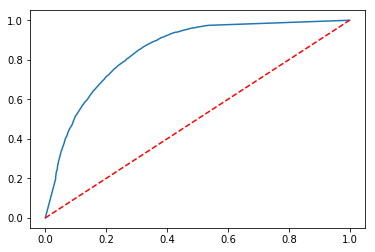

In [102]:
%%time
clasificador_arbol(x_train, y_train, x_test, y_test)

# Modelo de Logistic Regressor 

In [103]:
def clasificador_LR(X_train, Y_train, X_test, Y_test):
    
    classifier = LogisticRegression()
    
    classifier.fit(X_train, y_train)
    preds = classifier.predict(X_test)
    probs = classifier.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    return metricas(Y_test,preds)


/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC: 0.73
CPU times: user 369 ms, sys: 112 ms, total: 481 ms
Wall time: 410 ms


(0.7278192189556824,
 0.7398180426834453,
 0.7346335697399528,
 0.7372166913789452)

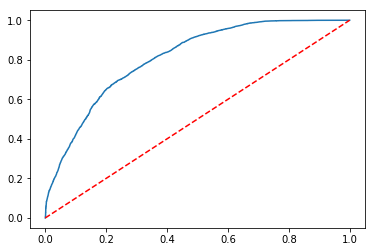

In [104]:
%%time
clasificador_LR(x_train, y_train, x_test, y_test)

# Modelo Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
 
def clasificador_RF(X_train, Y_train, X_test, Y_test):
    # Crear el modelo con 100 arboles #verbose=2 para ver más detalle del proceso
    model = RandomForestClassifier(n_estimators=100, 
                                   bootstrap = True,
                                   max_features = 'sqrt')
    # a entrenar!
    model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(Y_test, probs[:, 1])
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    return metricas(Y_test,preds)


AUC: 0.77
CPU times: user 6.49 s, sys: 148 ms, total: 6.64 s
Wall time: 6.7 s


(0.7731899956121105,
 0.8321571294957911,
 0.7538900015405947,
 0.7910924301822737)

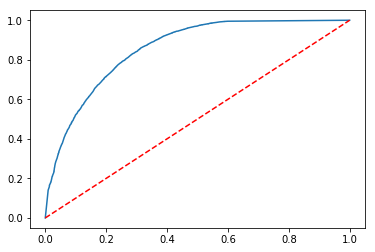

In [106]:
%%time
clasificador_RF(x_train, y_train, x_test, y_test)

# SVM Classifier

In [113]:
from sklearn import svm
 
def clasificador_SVM(X_train, Y_train, X_test, Y_test):

    # Initialize SVM classifier
    clf = svm.SVC(kernel='linear')

    # Fit data
    clf = clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    return metricas(Y_test,preds)

In [114]:
%time
clasificador_SVM(x_train, y_train, x_test, y_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
AUC: 0.73


(0.7296621325142606,
 0.7695774168863192,
 0.7239641657334827,
 0.7460742694637926)

In [109]:
train.head()

,COD_VERRACO,CENTRO,DOSIS_REAL_x,RAZA,AÑO,DOSIS_REAL_y,PRODUCTIVO,LINEA_GEN,CODIGO,PROCEDENCIA,RAZA_ENCODED,CENTRO_ENCODED,GENETICA_ENCODED,PROCEDENCIA_ENCODED
37177,2613.0,CAL,37.0,TDDDD,2020.0,77.0,0.0,TDDDD,2613.0,"TOJAPIGS SARL DOMBRAS-1, RUE NAPOLEON FRANCIA",0.43,0.42,0.429,0.28
37182,2613.0,CAL,23.0,TDDDD,2020.0,77.0,0.0,TDDDD,2613.0,"TOJAPIGS SARL DOMBRAS-1, RUE NAPOLEON FRANCIA",0.43,0.42,0.429,0.28
37125,2612.0,CAL,42.0,TDDDD,2020.0,77.0,0.0,TDDDD,2612.0,"TOJAPIGS SARL DOMBRAS-1, RUE NAPOLEON FRANCIA",0.43,0.42,0.429,0.28
37132,2612.0,CAL,34.0,TDDDD,2020.0,77.0,0.0,TDDDD,2612.0,"TOJAPIGS SARL DOMBRAS-1, RUE NAPOLEON FRANCIA",0.43,0.42,0.429,0.28
36966,2610.0,CAL,38.0,TDDDD,2020.0,80.0,1.0,TDDDD,2610.0,"TOJAPIGS SARL DOMBRAS-1, RUE NAPOLEON FRANCIA",0.43,0.42,0.429,0.28


**Este último estudio se ha realizado con el objetivo de ver el peso de cada variable sobre el resultado final, así como ver que relación tienen las diferentes variables entre sí**

In [110]:
small_train = train.loc[:, ['RAZA_ENCODED', 'CENTRO_ENCODED', 'GENETICA_ENCODED', 'PROCEDENCIA_ENCODED', 'DOSIS_REAL_y', 'PRODUCTIVO']]

In [111]:
c = small_train.corr()

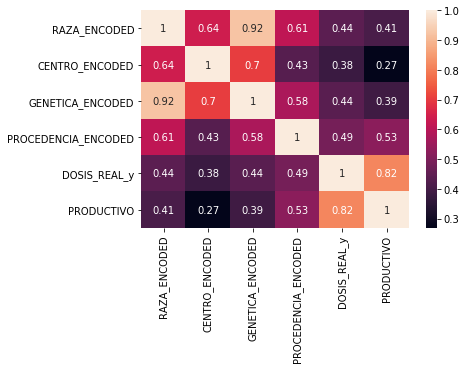

In [112]:
sns.heatmap(c, annot = True);